# Plotting all ages at M-17 and comparing with other published data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyleoclim as pyleo

try:
    import simplejson as json
except (ImportError,):
    import json

import scripts.OxcalReader as ox

from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

pyleo.set_style('journal')  # set the visual style

In [4]:
ages = ox.ReadFile('data/age_model/Comparison_M17_Croatia.json')

In [5]:
names = []

for n,elem in enumerate(ages['ocd']):
    try:
        names.append({elem['name']:n})
    except:
        continue
names

[{'M17_KDE': 1},
 {'M17_KDE_Kernel': 2},
 {'M17_KDE_Scale': 3},
 {'M17_sum': 4},
 {'': 5},
 {"'start'": 6},
 {'M17_deep': 7},
 {'MIG7': 8},
 {'MIG8': 9},
 {'MIG9': 10},
 {'MIG10': 11},
 {'MIG1': 12},
 {'MIG2': 13},
 {'MIG3': 14},
 {'MIG4': 15},
 {'MIG5': 16},
 {'MIG6': 17},
 {'MIG18': 18},
 {'MIG19': 19},
 {'MIGC1': 20},
 {'MIGC2': 21},
 {'MIGC4': 22},
 {'MIGC6': 23},
 {'MIG11': 24},
 {"'end'": 25},
 {'Hundalm_KDE': 26},
 {'Hundalm_KDE_Kernel': 27},
 {'Hundalm_KDE_Scale': 28},
 {'Hundalm': 29},
 {'': 30},
 {"'start'": 31},
 {'Hundalm': 32},
 {'H1': 33},
 {'H2': 34},
 {'H3': 35},
 {'H12': 36},
 {'H13': 37},
 {'H14': 38},
 {'H16': 39},
 {'H17': 40},
 {'H18': 41},
 {'H19': 42},
 {'H20': 43},
 {'H21': 44},
 {'H22': 45},
 {'H23': 46},
 {'H25': 47},
 {'H26': 48},
 {'H27': 49},
 {'H28': 50},
 {'H-I': 51},
 {"'end'": 52},
 {'Kugina_mod': 53},
 {'Kugina_mod_Kernel': 54},
 {'Kugina_mod_Scale': 55},
 {'Kugina_sum': 56},
 {'': 57},
 {"'start'": 58},
 {'Kugina': 59},
 {'KG1': 60},
 {'KG2': 61},
 {'

In [6]:
migovec = {ages['ocd'][n]['name']:ages['ocd'][n] for n in range(8,25)}
hundalm = {ages['ocd'][n]['name']:ages['ocd'][n] for n in range(33,52)}
kugina = {ages['ocd'][n]['name']:ages['ocd'][n] for n in range(60,64)}
vukusic = {ages['ocd'][n]['name']:ages['ocd'][n] for n in range(72,74)}
z = {ages['ocd'][n]['name']:ages['ocd'][n] for n in range(82,85)}

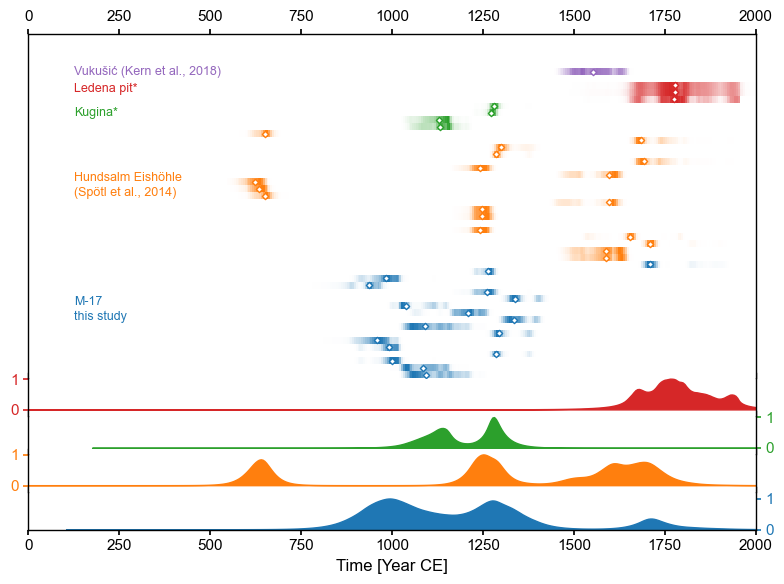

Figure saved at: "outputs/f08.pdf"
Figure saved at: "../reports/M17_manuscript/figures/f08.pdf"


In [8]:
fig = plt.figure(figsize = (8,6))

gs = GridSpec(5, 1, height_ratios=[8, 1, 1, 1, 1])

for j,n in enumerate((1,26,53,75)):
    c ='C{}'.format(j)
    kde = ages['ocd'][n]
    axi = plt.subplot(gs[4-j])
    
    s_plot,s_med = ox.FillBetween(axi,kde,color = c)
    
    
    axi.set_xlim(0,2000)
    
    axi.set_yticks([0,1])
    axi.grid()
    axi.spines['right'].set_visible(True)
    if j !=0:
        axi.set_ylim(-0.2,1.2)
        axi.spines['bottom'].set_visible(False)
        axi.set_xticks([])
    else:
        axi.set_ylim(0,1.4)
        axi.spines['bottom'].set_visible(True)
        axi.set_xlabel("Time [Year CE]")
    if (j % 2) == 0:
        axi.yaxis.tick_right()
        
    axi.yaxis.label.set_color(c)
    axi.tick_params(axis='y', colors=c)

axRect = plt.subplot(gs[0])
carryover = 0

caves = ["M-17\nthis study","Hundsalm Eishöhle\n(Spötl et al., 2014)","Kugina*","Ledena pit*","Vukušić (Kern et al., 2018)"]

for i, cave in enumerate((migovec,hundalm,kugina,z,vukusic)):
    
    # color
    c = 'C{}'.format(i)
    
    # migovec rectangles
    for n, elem in enumerate(cave):
        d = ox.MakeRects(axRect,cave[elem],carryover+n,facecolor = c)

    # medians
    medians = [cave[elem]['posterior']['median'] for elem in cave]
    axRect.scatter(medians,np.arange(carryover,carryover+len(cave))+0.5,facecolor = 'white',edgecolor=c,zorder = 100,marker = 'D',s=10)
    
    # write the name of the cave
    axRect.text(125,(carryover+carryover+len(cave))/2,caves[i],color = c,fontsize=9)

    # min strat
    carryover +=len(cave)

    
    
axRect.set_xlim(0,2000)
axRect.set_ylim(0,50) 
axRect.grid([])
axRect.set_yticks([])
axRect.xaxis.set_ticks_position('top')

axRect.spines['right'].set_visible(True)
axRect.spines['bottom'].set_visible(False)
axRect.spines['top'].set_visible(True)

plt.tight_layout()
plt.subplots_adjust(hspace =-0.05)


pyleo.showfig(fig)
pyleo.savefig(fig,path='outputs/f08.pdf',settings={"dpi":300})
pyleo.savefig(fig,path='../reports/M17_manuscript/figures/f08.pdf',settings={"dpi":300})
pyleo.closefig()